In [42]:
import pandas as pd
import numpy as np


In [43]:
pt = pd.read_csv(r"D:\python files\Property_Price_Train.csv")

In [44]:
pt.Lot_Extent = pt.Lot_Extent.fillna(70)
pt.Lane_Type = pt.Lane_Type.fillna('Grvl')
pt.Brick_Veneer_Type = pt.Brick_Veneer_Type.fillna('None')
pt.Brick_Veneer_Area = pt.Brick_Veneer_Area.fillna(0)
pt.Basement_Height = pt.Basement_Height.fillna('TA')
pt.Basement_Condition = pt.Basement_Condition.fillna('TA')
pt.Exposure_Level=pt.Exposure_Level.fillna('No')
pt.BsmtFinType1 = pt.BsmtFinType1.fillna('Unf')
pt.BsmtFinType2 = pt.BsmtFinType2.fillna('Unf')
pt.Electrical_System=pt.Electrical_System.fillna('SBrkr')
pt.Fireplace_Quality = pt.Fireplace_Quality.fillna('Gd')
pt.Garage=pt.Garage.fillna('Attchd')
pt.Garage_Built_Year=pt.Garage_Built_Year.fillna(2005)
pt.Garage_Finish_Year=pt.Garage_Finish_Year.fillna('Unf')
pt.Garage_Quality=pt.Garage_Quality.fillna('TA')
pt.Garage_Condition=pt.Garage_Condition.fillna('TA')
pt.Pool_Quality=pt.Pool_Quality.fillna('Gd')
pt.Fence_Quality=pt.Fence_Quality.fillna('MnPrv')
pt.Miscellaneous_Feature=pt.Miscellaneous_Feature.fillna('Shed')


In [45]:
pt= pt.drop(['Fireplace_Quality','Fence_Quality','Miscellaneous_Feature','Id','Pool_Quality','Lane_Type'], axis=1)

In [46]:
pt.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,65.0,8450,Paved,Reg,Lvl,AllPub,I,GS,...,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,20,RLD,80.0,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,...,15.039392,0,0,0,0,5,2007,WD,Normal,181500
2,60,RLD,68.0,11250,Paved,IR1,Lvl,AllPub,I,GS,...,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,60.0,9550,Paved,IR1,Lvl,AllPub,C,GS,...,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,84.0,14260,Paved,IR1,Lvl,AllPub,FR2P,GS,...,21.788818,0,0,0,0,12,2008,WD,Normal,250000


In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [48]:
pt[pt.select_dtypes(include=['object']).columns]= pt[pt.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [49]:
pt.isnull().sum()[pt.isnull().sum()>0]

Series([], dtype: int64)

In [50]:
pt.shape

(1459, 75)

In [51]:
from sklearn.model_selection import train_test_split

In [108]:
pt=df1 #for removing outliers we covert in df1

In [109]:
pt_train,pt_test= train_test_split(pt,test_size=.2)

In [110]:
pt_train_x=pt_train.iloc[:,0:-1]
pt_train_y=pt_train.iloc[:,-1]

In [111]:
pt_test_x = pt_test.iloc[: , 0:-1]
pt_test_y = pt_test.iloc[: , -1]

In [112]:
pt_train_y.head()

102     118964
716     159500
138     230000
1023    191000
359     280000
Name: Sale_Price, dtype: int64

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
linreg=LinearRegression()

In [115]:
linreg.fit(pt_train_x,pt_train_y)

LinearRegression()

In [116]:
linreg.score(pt_train_x,pt_train_y)

0.8452736827963379

In [117]:
Rsquare=linreg.score(pt_train_x,pt_train_y)

In [118]:
n=pt_train_x.shape[0]
k=pt_train_x.shape[1]

In [119]:
AdjRsquare=1-(1-Rsquare)*(n-1)/(n-k-1)
AdjRsquare

0.8336495736866212

In [120]:
pred_train=linreg.predict(pt_train_x)
pred_test=linreg.predict(pt_test_x)

In [121]:
err_train =pt_train_y - pred_train
err_test=pt_test_y-pred_test

In [122]:
import numpy as np

In [123]:
np.mean(err_train)

-1.8000444573051525e-10

In [124]:
import matplotlib.pyplot as plt

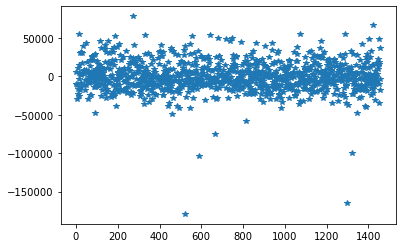

In [125]:
plt.plot(err_train,'*')

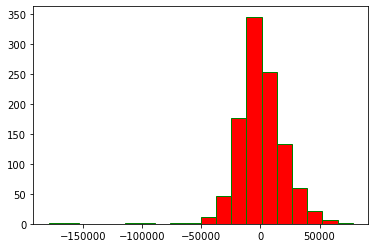

In [126]:
plt.hist(err_train,color='r',bins=20,edgecolor='g');
# normal distribution property are broken here
# its lepto curtosis

In [127]:
pred_actual_df= pd.DataFrame() #create empty dataframe 

In [128]:
pred_actual_df['Actual']= pt_train_y
pred_actual_df['Predict']= pred_train

In [129]:
pred_actual_df.head()

,Actual,Predict
102,118964,120079.218836
716,159500,164284.979414
138,230000,241376.293945
1023,191000,189875.330456
359,280000,254162.775155


In [130]:
import seaborn as sns

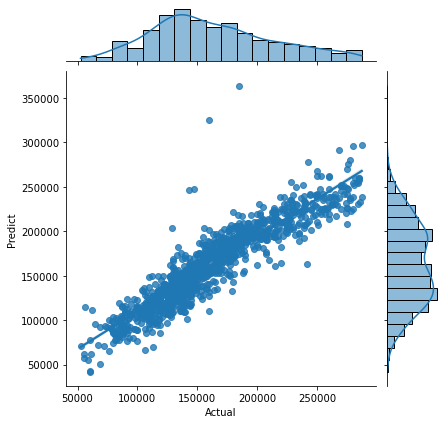

In [131]:
sns.jointplot(x='Actual', y='Predict',data= pred_actual_df, kind='reg')
#assumution check homocedacity


In [132]:
#some points far  away from the regression  line 
#these points we are taaking as outliers

In [ ]:
#remove outliers program

In [105]:
def remove_outliers(df, col, k):
    mean= df[col].mean()
    global df1
    sd= df[col].std()
    final_list=[x for x in df[col] if (x>mean-k*sd)]
    final_list= [x for x in final_list if (x<mean + k*sd)]
    df1 =df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print('number of outliers removed ==>', df.shape[0]-df1.shape[0])

In [106]:
# df1 is the final dataframe where outliers have been removed    

In [107]:
remove_outliers(pt, 'Sale_Price', 2)

(1326, 75)
number of outliers removed ==> 70
